# Firefly Optimization algorithm

In this notebook, we will demonstrate Firefly optimization algorithm.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from itertools import product, combinations
from collections import namedtuple

In [2]:
PeakDef = namedtuple("PeakDef", ["pos", "height", "sigma"])
peakdef = [
    PeakDef(np.array([0.5, 0.5]), 1, 0.05),
    PeakDef(np.array([0.25, 0.25]), 0.5, 0.05),
    PeakDef(np.array([0.75, 0.75]), 0.5, 0.05),
    PeakDef(np.array([0.75, 0.25]), -1., 0.05),
    PeakDef(np.array([0.25, 0.75]), -0.5, 0.1)
]
def peaks(x):
    return sum([peak.height * np.exp(-np.sum((x - peak.pos) ** 2 / peak.sigma, axis=1)) for peak in peakdef])

In [3]:
x = y = np.arange(0,1,0.01)
X, Y = np.meshgrid(x, y)

In [4]:
Z = peaks(np.vstack([X.flat, Y.flat]).T).reshape(X.shape)
peaks_bottom = Z.min()

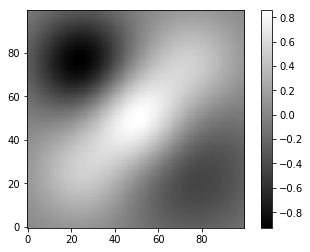

In [5]:
plt.imshow(Z.T, cmap=plt.cm.gray, origin='lower')
plt.colorbar()

In [6]:
flies = np.random.rand(100,2)

In [7]:
def plot_flies(flies, use_colorbar=True, ax=None, fig=None):
    if ax is None:
        fig, ax = plt.subplots()
    inten = np.minimum(100, 1. / (peaks(flies) - peaks_bottom))
    im = ax.imshow(Z, cmap=plt.cm.gray, extent=(0,1,0,1), origin='lower')
    if use_colorbar:
        fig.colorbar(im)
    ax.scatter(flies[:,0], flies[:,1], s=inten * 2, c='red', alpha=0.5)

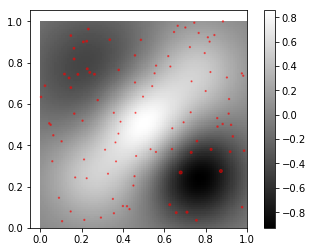

In [8]:
plot_flies(flies)

In [9]:
def firefly_optimize(callback, max_iter=10, freq=2, initial_range=(0,0,1,1), descent_rate = 0.01):
    mins = np.array(initial_range[:2]).reshape([1,2])
    maxs = np.array(initial_range[2:]).reshape([1,2])
    flies = (np.random.rand(100,2)) * (maxs - mins) + mins
    for n in range(max_iter):
        if n % freq == 0:
            callback(flies)
        inten = 1. / (peaks(flies) - peaks_bottom)
        for i,fly in enumerate(flies):
            for j,jfly in enumerate(flies):
                if i == j:
                    continue
                if inten[i] < inten[j]:
                    fly += descent_rate * (jfly - fly)
    return flies

In [ ]:
def plot_callback(flies):
    plt.figure()
    plot_flies(flies)

firefly_optimize(plot_callback, initial_range=(0,0.5,0.5,1));

In [11]:
def save_anim(initial_range=(0,0,1,1), filename='firefly.gif', writer='imagemagick'):
    import sys

    flies_history = []
    def history_callback(flies):
        flies_history.append(flies.copy())

    firefly_optimize(history_callback, max_iter=50, freq=1, initial_range=initial_range, descent_rate=0.005)

    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots(figsize=(4,4))

    # initialization function: plot the background of each frame
    def init():
        plot_flies(flies_history[0], False, ax=ax, fig=fig)
        return ()

    # animation function. This is called sequentially
    def animate(i):
        ax.clear()
        plot_flies(flies_history[i], False, ax=ax, fig=fig)
        ax.axis('equal')
        sys.stdout.write('.')
        sys.stdout.flush()
        return ()

    # call the animator. blit=True means only re-draw the parts that 
    # have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(flies_history), interval=20, blit=True)
    
    anim.save(filename, writer=writer, fps=10)

## Save to Gif (requires ImageMagick installed)

..................................................

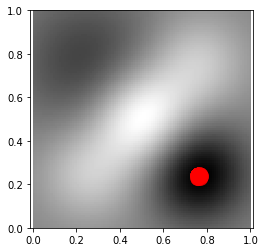

In [12]:
save_anim()

..................................................

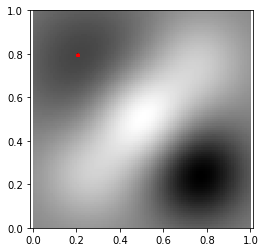

In [13]:
save_anim(initial_range=(0, 0.5, 0.5, 1), filename='firefly-local.gif')

# Showing GIF

Global minimum

![image](firefly.gif)

Stuck on a local minimum

![image](firefly-local.gif)

## Save to MP4 (requires ffmpeg, which comes with ImageMagick installer on Windows)

..................................................

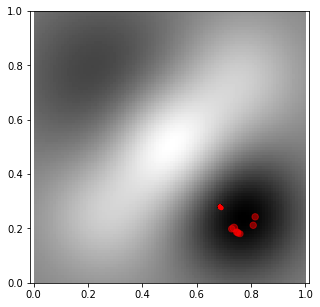

In [70]:
save_anim(filename='firefly.mp4', writer='ffmpeg')
#mywriter = animation.FFMpegWriter(fps=30)
#anim.save('dijkstra.flv', writer=mywriter)
#anim.save('dijkstra.mp4', writer='ffmpeg')

# Showing mp4


In [71]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="firefly.mp4" type="video/mp4">
</video></div>